# Games on Networks

In [1]:
%%capture
# Housekeeping
import networkx as nx
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl
import random as rn
import matplotlib.patches as mpatches

# Make sure you download econ46_library.py from our course material and save it in the same folder as then notebooks
# this file has some functions specifically coded for the class
from supporting_material import econ46_library as el

# These modules are only to have some interactive pieces of code in the notebooks
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [2]:

def complements_game(G,share,active_seed,max_iter=10000):
    node_list =  list(G.nodes())
    n = len(node_list)
    actions =  np.zeros((n,1)) 
    for node in active_seed:
        actions[node,0] = 1
    node_list.sort()
    A = nx.to_numpy_matrix(G,nodelist=node_list)
    degree= A.sum(axis=1)
    pos_deg = degree==0

    actions1 = np.zeros((1,n))
    iteration=0
    while (actions != actions1).any() and iteration<max_iter:
        actions1 = actions.copy()
        actions = ((np.dot(A,actions1)>=(degree*share+pos_deg)).astype(int))>0
        iteration = iteration+1
        if iteration == max_iter:
            print('Game did not converge in %s iterations' % iteration)
            return
        
    actions_l = actions.reshape(n,1)
    exposed_nodes = [node for node in node_list if actions_l[node]==1]
    clean_nodes   = [node for node in node_list if actions_l[node]==0]
    
    
    plt.figure(figsize=(5,5))
    pos0 = nx.kamada_kawai_layout(G)
    ec = nx.draw_networkx_edges(G, pos0, alpha=1)
    nc = nx.draw_networkx_nodes(G, pos0, nodelist=exposed_nodes,node_color=('#0072b2'), 
                            with_labels=True,font_color='black', font_weight='bold', node_size=500)
    nn = nx.draw_networkx_nodes(G, pos0, nodelist=clean_nodes,node_color=('#cc79a7'), 
                            with_labels=True, font_color='black', font_weight='bold', node_size=500)
    nl = nx.draw_networkx(G, node_color='none',alpha=1,font_color='white', font_weight='bold',
                              pos=pos0,with_labels = True,node_size=500)


    blue_patch = mpatches.Patch(color='#0072b2', label='Action')
    red_patch = mpatches.Patch(color='#cc79a7', label='NO Action')
    plt.legend(bbox_to_anchor=(1, 1),handles=[blue_patch,red_patch])
        
        
    plt.axis('off')
    ax2= plt.gca()
    ax2.collections[0].set_edgecolor("#000000")
    plt.show()
    

 ## If you can't see any network under this line, run the cell of code and change the parameters when the buttons appear.

In [3]:
display(el.accordion_h,el.accordion_h2,el.lays_h,el.atts_h,el.y_h)


Accordion(children=(HBox(children=(BoundedIntText(value=10, description='Nodes:', min=1), FloatSlider(value=0.…

Accordion(children=(VBox(children=(HBox(children=(ToggleButton(value=False, button_style='success', descriptio…

ToggleButtons(description='Layout:', options=('Spring', 'Circle', 'Kamada Kawai', 'Random'), tooltips=('Circul…

Dropdown(description='Attribute:', options=('', 'Degree Centrality', 'Clustering Centrality', 'Betweenness Cen…

Output()

Share-of-friends-acting needed to get value from acting too: 0.25


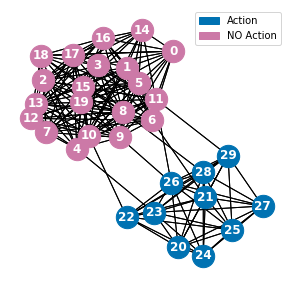

Share-of-friends-acting needed to get value from acting too: 0.3


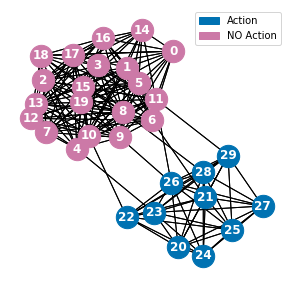

Share-of-friends-acting needed to get value from acting too: 0.5


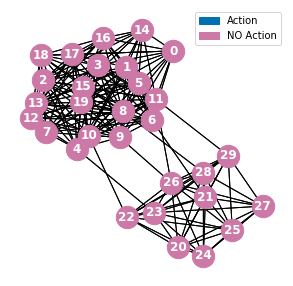

Share-of-friends-acting needed to get value from acting too: 0.6


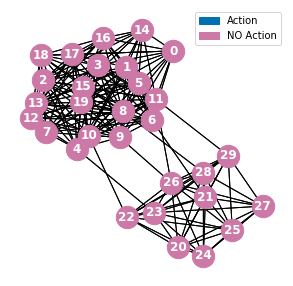

Share-of-friends-acting needed to get value from acting too: 0.75


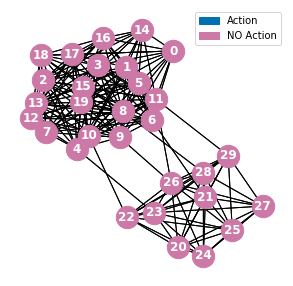

In [10]:
G = nx.from_pandas_edgelist(el.edgelist_h)
active_seed = [27,25,28]
for share in [.25,.3,.5,.6,.75]:
    print('Share-of-friends-acting needed to get value from acting too:', share)
    complements_game(G,share,active_seed)

# Peer Effects

Below you can observe the Dutch Highschool network at different points in time and the alcohol consumption of the nodes.

#### Note: Both drinking behavior and reported gender can be shown in the graph by way of coloring the nodes. Thus you cannot see both pieces of information at the same time.

### Are drinkers more likely to be friends? Are they more likely to be popular?

## Remember: excessive alcohol use leads to harmful outcomes in both  the short and long terms. If you are underage you should not drink at all (no, it really is not cool, it's overrated).

In [5]:

display(el.nets_drink,el.types_drink,el.accordion_drink,el.lays_drink,el.atts_drink,el.y_drink)


ToggleButtons(description='Period:', options=('t=0', 't=1', 't=2', 't=3'), tooltips=('High School Classroom in…

ToggleButtons(description='Types', options=('None', 'Reported Gender'), tooltips=('High School Classroom in th…

Accordion(children=(ToggleButtons(description='Alcohol Use:', options=('No Info', 't=1', 't=2', 't=3'), toolti…

ToggleButtons(description='Layout:', options=('Kamada Kawai', 'Circle', 'Spring', 'Random'), tooltips=('Circul…

Dropdown(description='Attribute:', options=('', 'Degree Centrality', 'Clustering Centrality', 'Betweenness Cen…

Output()